# <center> <span style="color:lightblue">Deep Learning</span>

# <center> <span style="color:lightblue">Preception</span>

<center><img src="Newral_Network.excalidraw.png">

## <center> <span style="color:lightblue">Forward Propogation</span>

## <center> <span style="color:lightblue">Backward Propogation</span>

## <center> <span style="color:lightblue">Laso Function</span>

- MSE (Mean Squired Error)
- MAE (Mean Absolute Error)
- Huber Loss

## <center> <span style="color:lightblue">Activation Function</span>

- Sigmod Function
- tanh Function
- ReLU (Rectified Linear Unit) Function
  - PReLU
  - Leaky ReLU
- ELU (Exponential Linear Units) Function 
- Softmax Function
- Swish (A Self-Gated) Function

## <center> <span style="color:lightblue">Optimizer</span>

- Gradient Descent
- Stochastic Gradient Descent (SGD) 
- mini batch SGD
- SGD with  momentem
- adagrad
- RMSProp
- Adam optimizer (Generally  used)

https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.70120&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

# <center> <span style="color:lightblue">Regularization in Deep Learning | L2 Regularization in ANN | L1 Regularization | Weight Decay in ANN</span>

In [1]:
#https://www.youtube.com/watch?v=d2kxUVwWWwU



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [3]:
X,y=make_moons(100,noise=0.25,random_state=2)

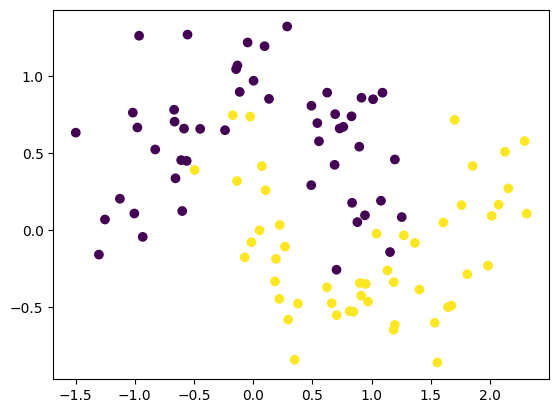

In [4]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [5]:
""" 
first Node Layer uses "relu" second/hidden Layer generally uses "relu" the O/P layer since it is catogorical it uses  "sigmoid"
if it was multi catogorical it would use "softmax"
"""
model1=Sequential()
model1.add(Dense(128,input_dim=2,activation="relu"))
model1.add(Dense(128,activation="relu"))
model1.add(Dense(1,activation="sigmoid"))
model1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
adam=Adam(learning_rate=0.01)
model1.compile(loss="binary_crossentropy",optimizer=adam,metrics=["accuracy"])

history1= model1.fit(X,y,epochs=2000,validation_split=0.2,verbose=0)


9600/9600 [==============================] - 33s 3ms/step


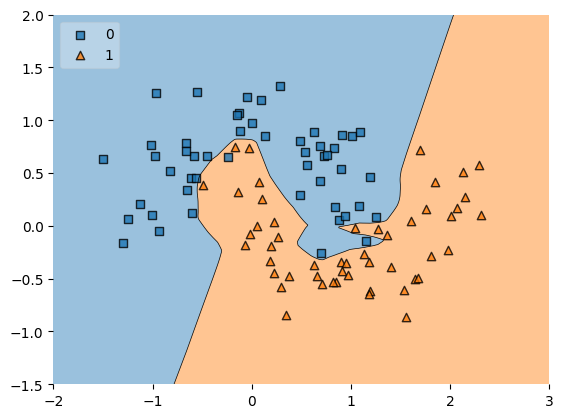

In [7]:
plot_decision_regions(X,y.astype("int"),clf=model1,legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

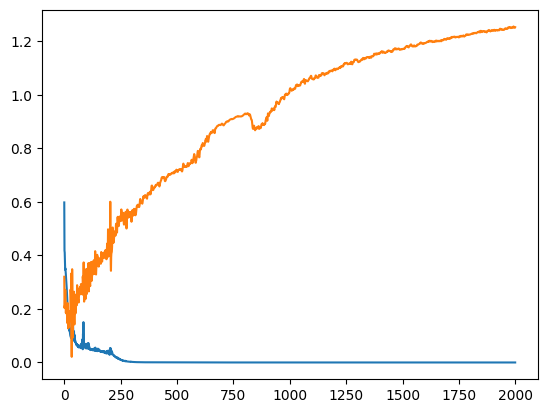

In [8]:
plt.plot(history1.history["loss"])
plt.plot(history1.history["val_loss"])
plt.show()

In [9]:
model2=Sequential()
model2.add(Dense(128,input_dim=2,activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l2(0.05)))
model2.add(Dense(128,activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l2(0.03)))
model2.add(Dense(1,activation="sigmoid"))
model2.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               384       
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
adam=Adam(learning_rate=0.01)
model2.compile(loss="binary_crossentropy",optimizer=adam,metrics=["accuracy"])

history2= model2.fit(X,y,epochs=2000,validation_split=0.2,verbose=0)


9600/9600 [==============================] - 26s 3ms/step


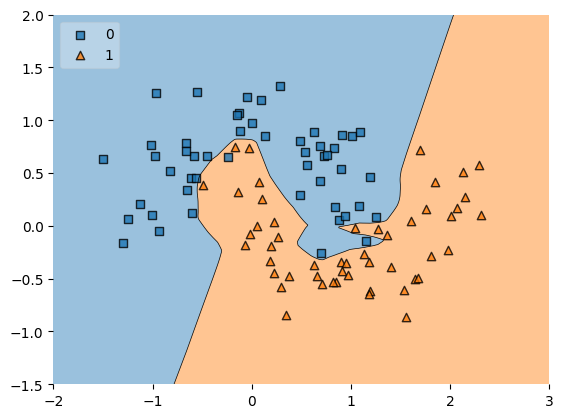

In [11]:
plot_decision_regions(X,y.astype("int"),clf=model1,legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

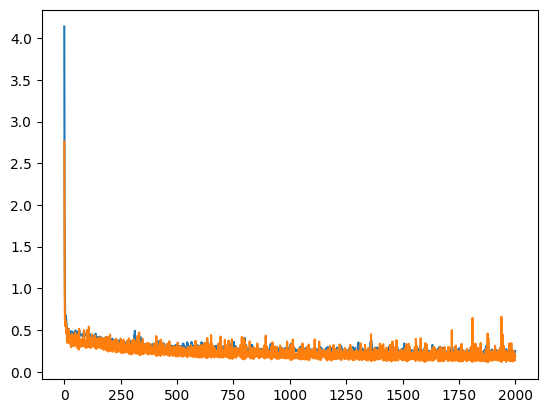

In [12]:
plt.plot(history2.history["loss"])
plt.plot(history2.history["val_loss"])
plt.show()

In [13]:
model1_weight_layer1 = model1.get_weights()[0].reshape(256)
model2_weight_layer1 = model2.get_weights()[0].reshape(256)

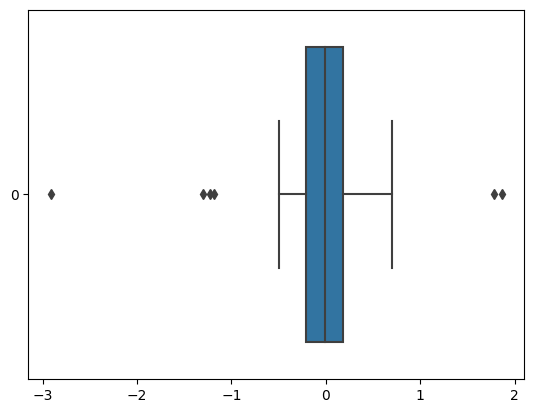

In [14]:
sns.boxplot(model1_weight_layer1,orient="h")
plt.show()

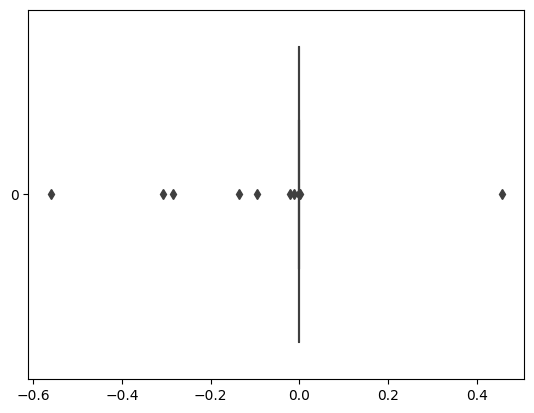

In [15]:
sns.boxplot(model2_weight_layer1,orient="h")
plt.show()

C:\Users\ACER\AppData\Local\Temp\ipykernel_12328\4260158865.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model1_weight_layer1)


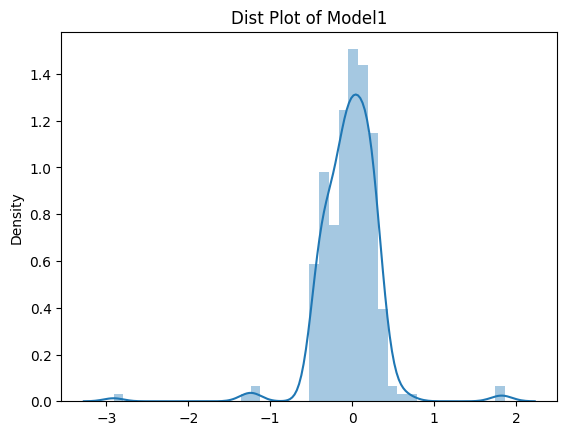

In [16]:
sns.distplot(model1_weight_layer1)
plt.title("Dist Plot of Model1")
plt.show()

C:\Users\ACER\AppData\Local\Temp\ipykernel_12328\1715520542.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model2_weight_layer1)


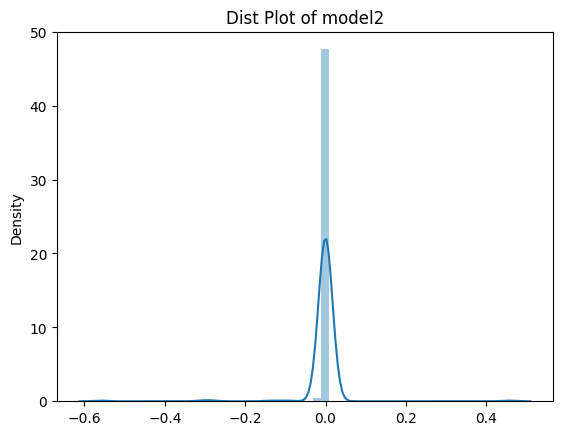

In [17]:
sns.distplot(model2_weight_layer1)
plt.title("Dist Plot of model2")
plt.show()

C:\Users\ACER\AppData\Local\Temp\ipykernel_12328\417276851.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model1_weight_layer1)
C:\Users\ACER\AppData\Local\Temp\ipykernel_12328\417276851.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model2_weight_layer1)


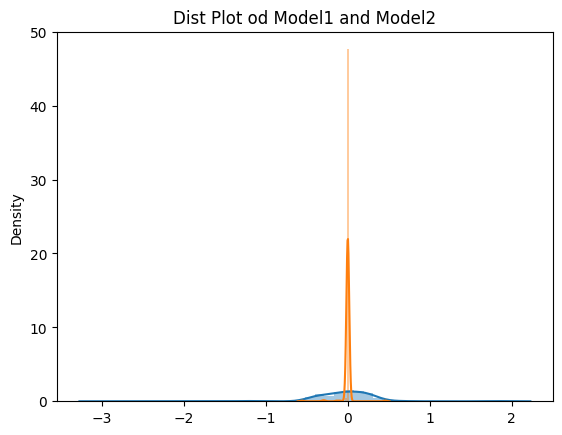

In [18]:
sns.distplot(model1_weight_layer1)
sns.distplot(model2_weight_layer1)
plt.title("Dist Plot od Model1 and Model2")
plt.show()

In [19]:
model_L1= Sequential()

model_L1.add(Dense(128,input_dim=2, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model_L1.add(Dense(128, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model_L1.add(Dense(1,activation='sigmoid'))

model_L1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               384       
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
adam = Adam(learning_rate=0.01)
model_L1.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history_L1= model_L1.fit(X, y, epochs=2000, validation_split = 0.2,verbose=0)

   1/9600 [..............................] - ETA: 23:50

9600/9600 [==============================] - 32s 3ms/step


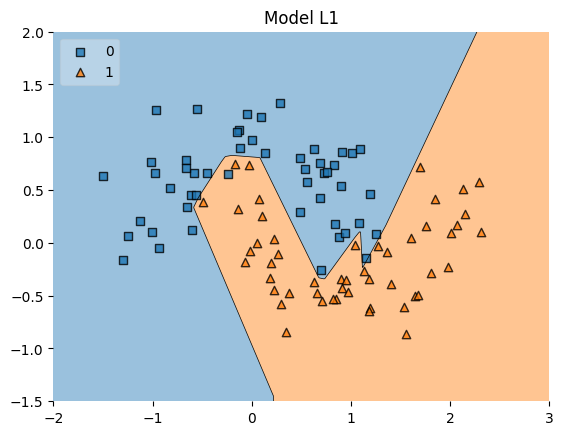

In [21]:
plot_decision_regions(X, y.astype('int'), clf=model_L1, legend=2)
plt.title("Model L1")
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

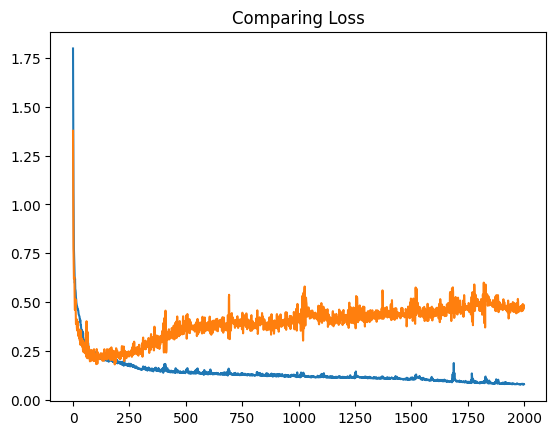

In [22]:
plt.plot(history_L1.history['loss'])
plt.plot(history_L1.history['val_loss'])
plt.title("Comparing Loss")
plt.show()

## <center> <span style="color:lightblue">Activation Function's</span>

In [23]:
#https://www.youtube.com/watch?v=1ggieRLSdYs
#https://archive.ics.uci.edu/datasets
data=pd.read_csv("https://raw.githubusercontent.com/sachinmotwani20/NPTEL-ML_Datasets/main/ScoresPrediction.csv")
# data = pd.read_csv('https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv')

data.head(3)

,FirstYrScore,SecondYrScore,StudyTime,Failures,Absences,FinalYrScore
0,5,6,2,0,6,6
1,5,5,2,0,4,6
2,7,8,2,3,10,10


### Non-Linear Activation Function's
- Activation Function's should always be `Non-Linear`
- if Activation Function's are `Linear` it behaves as a Linear Regression Line

>
> there are many `Non-Linear` Activation Function namely "Sigmoid", "Tanh" and "Relu" 
>
>`model_L1.add(Dense(128,input_dim=2, activation="~Activation Function~"))`
> 

Saturating functions :-
- Sigmoid (0-to-1) 
- Tanh (-1-to-1)
Non-Saturating functions :-
- Relu $f(X)=max(0-to-X)$

1. Sigmoid is only used in the output (nural-networl) of the model in deep learning models to squish the output between 0 and 1 (bassicaly in Clasification Problem's) it's never used in hidden layers. for hidden layers we use activation functions like ReLU, LeakyReLU, Tanh 